<a href="https://colab.research.google.com/github/badrinarayanan02/DataAnalytics/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Performing Clustering for MNIST Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import mode

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int64

Standardization

In [ ]:
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=0.95)
Xpca = pca.fit_transform(Xscaled)

KMeans Clustering

In [ ]:
nclusters = 10
kmeans = KMeans(n_clusters=nclusters)
kmeans.fit(Xpca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [ ]:
cluster = kmeans.labels_

In [ ]:
labels = np.zeros_like(cluster)
for i in range(nclusters):
    mask = (cluster == i)
    labels[mask] = mode(y[mask])[0]

Calculate Accuracy

In [ ]:
accuracy = accuracy_score(y, labels)
print("Accuracy:", accuracy)

Accuracy: 0.5199


Visualizing the clusters

In [ ]:
def plot(data,clusters,noimg = 10):
  fig,axes = plt.subplots(noimg,nclusters,figsize=(nclusters,noimg))
  for i in range(noimg):
    for j in range(nclusters):
      mask = (clusters == j)
      img = data[mask][i].reshape(28,28)
      axes[i][j].imshow(img,cmap='gray')
      axes[i][j].axis('off')
  plt.show()

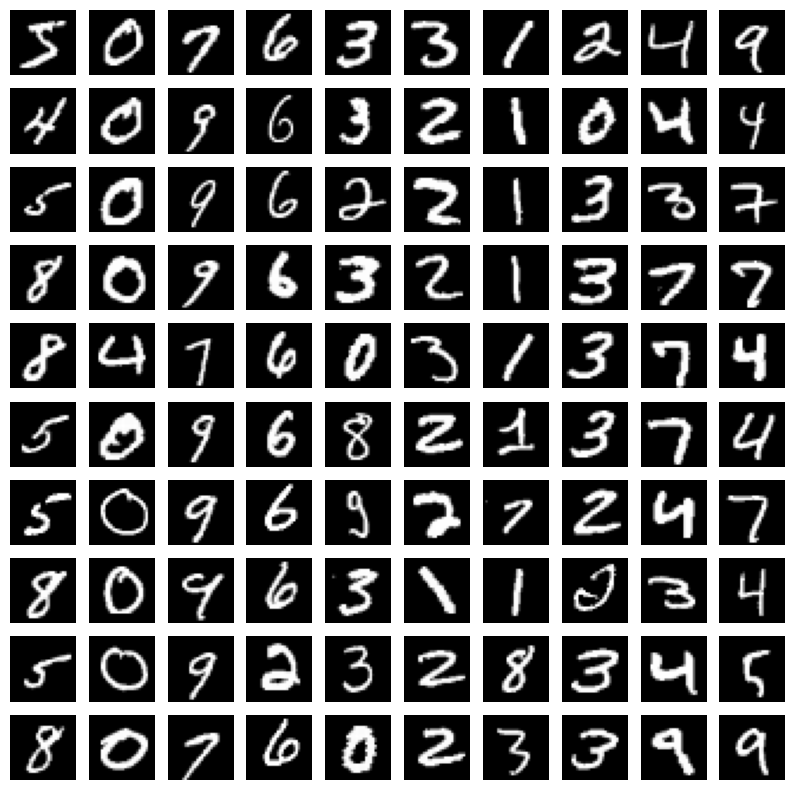

In [ ]:
plot(X.values,cluster)

Task -> Improve Accuracy